In [136]:
import pandas as pd;
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np

# function for returning region on basis of generation number
def regionChecker(argument):
    switcher = { 
        1: "Kanto",
        2: "Johto",
        3: "Hoenn",
        4: "Sinnoh",
        5: "Unova",
        6: "Kalos",
    } 
    return switcher.get(argument['Generation'], "nothing");
    
# read data for csv
pokemon_data = pd.read_csv('./PokemonData.csv');

# adding origin of pokemon/using pokeindex as indexing
data = pd.DataFrame(pokemon_data);
data = data.rename(columns={'Num': 'Pokedex_Index'});
data = data.set_index('Pokedex_Index');
data['Region_of_Origin'] = data.apply (lambda row: regionChecker(row), axis=1);
data

,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Region_of_Origin
Pokedex_Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Kanto
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Kanto
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Kanto
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Kanto
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,Kalos
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,Kalos
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,Kalos


Dropdown(description='Attribute', index=1, options=('HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'), val…

                                  Name  Attack  Legendary
Pokedex_Index                                            
150                MewtwoMega Mewtwo X     190       True
214            HeracrossMega Heracross     185      False
383              GroudonPrimal Groudon     180       True
384              RayquazaMega Rayquaza     180       True
386                 DeoxysAttack Forme     180       True
...                                ...     ...        ...
129                           Magikarp      10      False
242                            Blissey      10      False
213                            Shuckle      10      False
113                            Chansey       5      False
440                            Happiny       5      False

[800 rows x 3 columns]


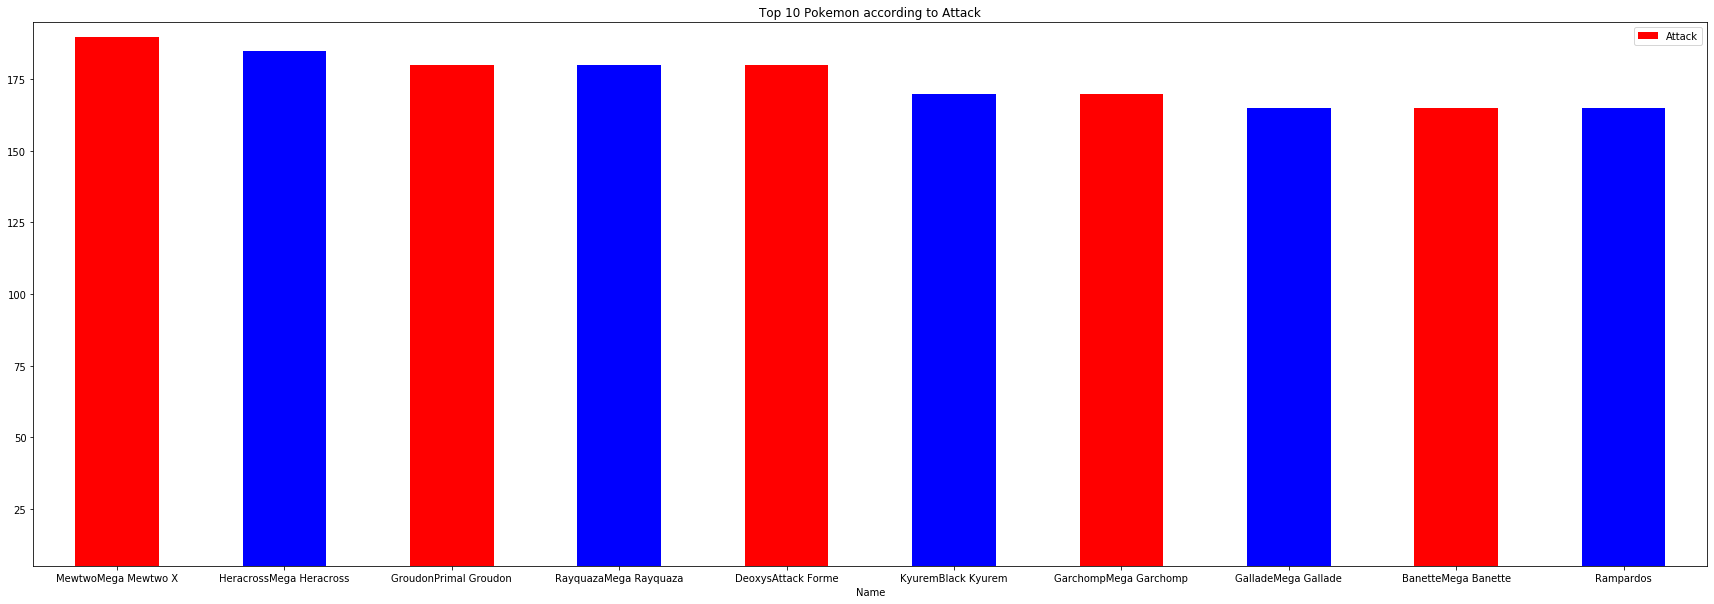

In [144]:
def attribute_data_handler(attrib):
    clear_output()
    attrib_data = data[['Name', attrib.new, 'Legendary']]
    display(attribute_dropdown)
    attrib_data = attrib_data.sort_values(by=attrib.new, ascending=False)
    print(attrib_data)
    maxYLimit = max(attrib_data[attrib.new])+5
    ax = attrib_data.head(10).plot(kind='bar',x='Name', y=attrib.new, rot=0, figsize=(30,10), 
                                   ylim=(min(attrib_data[attrib.new]),maxYLimit),
                                   title ='Top 10 Pokemon according to ' + attrib.new,
                                  color=['red','blue'])

attribute_dropdown = widgets.Dropdown(options=['HP','Attack','Defense', 'SpAtk','SpDef', 'Speed'],
                                      value=None,description='Attribute')
attribute_dropdown.observe(attribute_data_handler, names='value')
display(attribute_dropdown)